# Benchmarking Our Algorithm against others

In [2]:
import sys
sys.path.append('../')
from panav.environment.env import MultiTunnelEnv
from panav.hybrid import HybridGraph
from panav.viz import draw_hybrid,draw_env
from panav.SAMP.solvers import Tube_Planning,Simple_MILP_Planning
from panav.TrafficAwarePlanning import traffic_aware_HG_plan
from panav.util import flowtime,makespan

import numpy as np
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Environment

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-15


/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


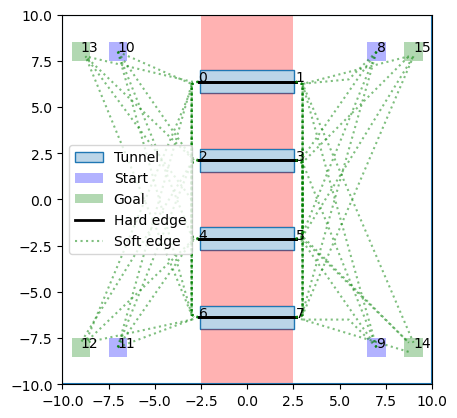

In [4]:
bloating_r = 0.5
env = MultiTunnelEnv(n_tunnel=4,tunnel_width=bloating_r*2.5,N_agent = 4)
HG = HybridGraph(env,bloating_r)
draw_hybrid(HG,plt.gca(),display_soft=True,display_node=True)
plt.show()    


In [ ]:
from panav.PBS.PBS import PBS
continuous_plans,_=PBS(env,vmax=1.0,bloating_r=0.5,low_level_planner="Simple_MILP_Planning")
print(makespan(continuous_plans),flowtime(continuous_plans))

continuous_plans,_=PBS(env,vmax=1.0,bloating_r=0.5,low_level_planner="Tube_Planning")
print(makespan(continuous_plans),flowtime(continuous_plans))


42.42750451318724 144.723512608423


In [10]:
from panav.TrafficAwarePlanning import TAHP

continuous_plans = TAHP(HG,vmax=1.0,bloating_r=0.5)
print(makespan(continuous_plans),flowtime(continuous_plans))

Planning for 0/4
Planning for 1/4
Planning for 2/4
Planning for 3/4
37.45556321810581 134.61004152001652


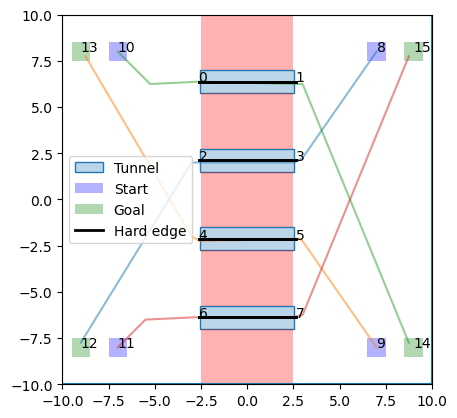

In [8]:
draw_hybrid(HG,ax=plt.gca(),paths = [o[1] for o in continuous_plans if o])

In [9]:
from panav.viz import animation,interpolate_positions

from IPython.display import HTML, display
interp_dt = 0.1

pos = []
for cp in continuous_plans:
    _,xs = interpolate_positions(*cp,interp_dt)
    pos.append(xs)

anim = animation(env, pos, bloating_r, dt = interp_dt / 4)
display(HTML(anim.to_jshtml()))
plt.close()   # Avoid plotting an extra figure.